In [1]:
import pandas as pd
import hashlib
import json
import networkx as nx
import matplotlib.pyplot as plt
# import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout

# Set cutoff
cutoff = 1000

# Load datasets
cvefixes = pd.read_csv("data_preprocessing/CVEfixes/CVEfixes_new.csv")
msr = pd.read_csv("data_preprocessing/Bigvul/MSR.csv")

# Load the JSON file representing the hierarchical structure
with open("data_preprocessing/preprocessed_datasets/debug_datasets/graph_all_paths.json", "r") as json_file:
    cwe_paths = json.load(json_file)

# # Add hash column for code, to check for uniqueness
# cvefixes['code.digest'] = cvefixes['code'].apply(lambda x: hashlib.sha1(x.encode()).hexdigest())
# msr['code.digest'] = msr['code'].apply(lambda x: hashlib.sha1(x.encode()).hexdigest())


In [2]:
filtered_df = cvefixes[cvefixes.isna().any(axis=1)]
print(filtered_df.shape)
filtered_df.isna().sum() # 20 nan in code, 20 nan in all other cols

(40, 4)


code      20
cwe_id    20
cve_id    20
vul       20
dtype: int64

In [3]:
cvefixes = cvefixes.dropna()
print(cvefixes.isna().sum())
cvefixes['cwe_id'] = cvefixes['cwe_id'].astype(int)
cvefixes['vul'] = cvefixes['vul'].astype(int)
cvefixes.head(5)

code      0
cwe_id    0
cve_id    0
vul       0
dtype: int64


,code,cwe_id,cve_id,vul
0,expand_dynamic_string_token (struct link_map *...,252,CVE-1999-0199,1
1,"_dl_dst_substitute (struct link_map *l, const ...",252,CVE-1999-0199,1
2,"_dl_dst_count (const char *name, int is_path)\...",252,CVE-1999-0199,1
3,"vsyslog(pri, fmt, ap)\n\tint pri;\n\tregister ...",252,CVE-1999-0199,1
4,init_syntax_once ()\n{\n register int c;\n ...,252,CVE-1999-0199,1


In [4]:
msr = msr.dropna()
msr.drop(columns=['Unnamed: 0'], inplace=True) 
msr.head(5)

,code,cwe_id,cve_id,vul
0,static PHP_FUNCTION(preg_match)\n{\n\tphp_do_p...,119,CVE-2015-8382,0
1,static PHP_FUNCTION(preg_match_all)\n{\n\tphp_...,119,CVE-2015-8382,0
2,static PHP_FUNCTION(preg_replace)\n{\n\tpreg_r...,119,CVE-2015-8382,0
3,static PHP_FUNCTION(preg_replace_callback)\n{\...,119,CVE-2015-8382,0
4,static PHP_FUNCTION(preg_filter)\n{\n\tpreg_re...,119,CVE-2015-8382,0


In [5]:
# Add hash column for code, to check for uniqueness
cvefixes['code.digest'] = cvefixes['code'].apply(lambda x: hashlib.sha1(x.encode()).hexdigest())
msr['code.digest'] = msr['code'].apply(lambda x: hashlib.sha1(x.encode()).hexdigest())

# # Remove code column
# cvefixes.drop(columns=['code'], inplace=True)
# msr.drop(columns=['code'], inplace=True)

# Combine datasets
alltbl = pd.concat([cvefixes, msr]).drop_duplicates()

alltbl['classpath'] = alltbl['cwe_id'].astype(str).map(cwe_paths)
alltbl['cwe_id'] = alltbl['cwe_id'].astype(int)
alltbl

,code,cwe_id,cve_id,vul,code.digest,classpath
0,expand_dynamic_string_token (struct link_map *...,252,CVE-1999-0199,1,5dfc31742fe5030464ddc789a8e939599bbab1a4,[10000-1000-703-754-252]
1,"_dl_dst_substitute (struct link_map *l, const ...",252,CVE-1999-0199,1,80ed4967cd5e6575ea7f9b0b471dc512be5cad41,[10000-1000-703-754-252]
2,"_dl_dst_count (const char *name, int is_path)\...",252,CVE-1999-0199,1,bdded5aedc003abdaca0471fb4a2dd9070f8a919,[10000-1000-703-754-252]
3,"vsyslog(pri, fmt, ap)\n\tint pri;\n\tregister ...",252,CVE-1999-0199,1,402d73979bf2a32ea656a71b93a912c7027a389c,[10000-1000-703-754-252]
4,init_syntax_once ()\n{\n register int c;\n ...,252,CVE-1999-0199,1,eb7ca045e999b9b6d086171176fa9b92d214bad8,[10000-1000-703-754-252]
...,...,...,...,...,...,...
145738,void impeg2d_dec_p_mb_params(dec_state_t *ps_d...,119,CVE-2016-0835,1,6b7fad7b957c6e130245163cbb07cc6df3863bdf,[10000-1000-664-118-119]
145739,void impeg2d_dec_pnb_mb_params(dec_state_t *ps...,119,CVE-2016-0835,1,fcdbb0685326dcd81cdb6f027cc61de89674b089,[10000-1000-664-118-119]
145740,int equalizer_get_parameter(effect_context_t *...,200,CVE-2017-0402,1,a792513015548d99e3d8b8d5600f843665711434,[10000-1000-664-668-200]
145741,"uint8_t rfc_parse_data(tRFC_MCB* p_mcb, MX_FRA...",125,CVE-2018-9503,1,4c73479fff542238b2861c96bac10887e973a4fa,[10000-1000-664-118-119-125]


In [6]:
# Create a DataFrame with counts for each cwe_id
cwecounts = alltbl.groupby('cwe_id').size().reset_index(name='count')
cwecounts
# Write cwecounts to a CSV file
# cwecounts.to_csv("cwecounts.csv", index=False)


,cwe_id,count
0,0,59109
1,20,23049
2,22,1440
3,23,2
4,27,1
...,...,...
166,1188,2
167,1236,44
168,1321,43
169,1333,5


In [7]:
def create_graph_from_json(paths_dict_data, max_depth=None):
    
    G = nx.DiGraph()

    def add_path_to_graph(path):
        nodes = list(map(int, path.split('-')))
        if max_depth:
            max_level = min(max_depth, len(nodes) - 1)
            for i in range(max_level):
                G.add_edge(nodes[i], nodes[i+1])
        else:
            for i in range(len(nodes) - 1):
                G.add_edge(nodes[i], nodes[i+1])

    # Add edges from the paths in the JSON data
    for key, paths_list in paths_dict_data.items():
        for path in paths_list:
            add_path_to_graph(path)
            
    return G

graph = create_graph_from_json(cwe_paths)
node_list = list(graph.nodes)

In [8]:
graph = create_graph_from_json(cwe_paths)
node_list = list(graph.nodes)
print(node_list)

[10000, 0, 1000, 707, 20, 664, 706, 22, 23, 27, 59, 669, 642, 73, 610, 74, 77, 78, 79, 80, 88, 943, 89, 90, 91, 93, 94, 913, 98, 829, 113, 435, 436, 116, 118, 119, 120, 787, 121, 788, 122, 125, 126, 1285, 129, 682, 131, 668, 134, 172, 178, 693, 184, 697, 1023, 185, 190, 191, 193, 200, 203, 208, 209, 703, 755, 212, 228, 241, 754, 252, 284, 269, 271, 273, 732, 276, 277, 281, 285, 287, 1390, 290, 294, 295, 297, 303, 304, 710, 573, 305, 306, 691, 799, 307, 311, 312, 319, 330, 344, 798, 321, 326, 327, 328, 331, 335, 338, 345, 346, 347, 352, 354, 358, 359, 362, 367, 369, 377, 378, 379, 384, 400, 404, 772, 401, 666, 415, 825, 416, 288, 425, 862, 673, 426, 427, 428, 434, 444, 665, 908, 457, 459, 470, 475, 476, 494, 502, 1391, 521, 522, 538, 532, 552, 565, 602, 601, 611, 672, 613, 670, 617, 66, 639, 640, 644, 662, 667, 834, 674, 704, 681, 684, 916, 759, 763, 770, 774, 776, 405, 786, 805, 823, 824, 449, 835, 843, 863, 909, 915, 441, 918, 922, 924, 1021, 221, 452, 1188, 1236, 1321, 407, 1333, 914

In [9]:
def show_tree_graph(graph):
 
    plt.figure(figsize=(30, 8))
    plt.tight_layout(pad=1.0)
    # plt.ylim(0, 5)  # Adjust as needed

    # Assuming pos has your node positions
    scale_factor_x = 1.2  # adjust as needed
    scale_factor_y = 0.8
    pos = graphviz_layout(graph, prog='dot')  # Use the Graphviz layout
    # print("pos\n",pos)
    pos = {node: (x * scale_factor_x, y * scale_factor_y) for node, (x, y) in pos.items()}
    # print("pos\n",pos)
    nx.draw(graph, pos=pos, with_labels=True, node_size=100, node_color="skyblue",font_size=4, width=1)
    # Set the title for the figure
    plt.title("Directed Acyclic Graph for CWE Hierarchy")
    # Save the plot as an image (e.g., PNG, JPEG, PDF)
#     plt.savefig("figures/filtered_cwe_DAG.png")

    plt.show()
    
def choose_favorite_parent(node, graph, cwe_counts):
    """
    Choose a favorite parent for a node in a graph based on the sum of 'count'
    associated with each parent's descendants (including the parent itself).

    Parameters:
    node (hashable): The node for which to choose the parent.
    graph (networkx.DiGraph): The directed graph containing the nodes.
    cwe_counts (pandas.DataFrame): A dataframe with 'cwe_id' and 'count' columns.

    Returns:
    hashable: The chosen parent node.
    """
    parents = list(graph.predecessors(node))
    
    if len(parents) == 1:
        return parents[0]

    num_parent_samples = []

    for p in parents:
        parent_family = nx.ancestors(graph, p) - set.union(*(nx.ancestors(graph, otherp) for otherp in parents if otherp != p))
        
        if parent_family:
            parent_descendants = set.union(*(nx.descendants(graph, x) for x in parent_family)).union({p})
        else:
            parent_descendants = parent_family

        num_parent_samples.append(
            cwe_counts[cwe_counts['cwe_id'].isin(parent_descendants)]['count'].sum()
        )

    return parents[num_parent_samples.index(max(num_parent_samples))]


In [10]:
graph_unique = nx.DiGraph()

for node in list(nx.topological_sort(graph))[1:]:
    graph_unique.add_edge(choose_favorite_parent(node, graph, cwecounts), node)


In [11]:
print(len(graph_unique.nodes), len(graph.nodes))
graph_unique.nodes

203 203


NodeView((10000, 0, 1000, 707, 664, 435, 682, 693, 697, 703, 284, 710, 691, 20, 74, 116, 172, 706, 669, 610, 913, 118, 668, 400, 404, 666, 673, 665, 704, 449, 922, 221, 436, 131, 190, 191, 193, 369, 311, 330, 326, 327, 345, 602, 1023, 185, 755, 228, 754, 269, 285, 287, 573, 684, 799, 362, 367, 670, 662, 834, 1285, 77, 79, 943, 91, 93, 1236, 644, 22, 59, 178, 66, 212, 434, 494, 384, 601, 611, 441, 94, 470, 502, 915, 914, 119, 134, 200, 377, 642, 427, 428, 405, 772, 459, 763, 415, 672, 908, 770, 909, 1188, 681, 843, 829, 452, 444, 312, 319, 344, 331, 335, 338, 328, 346, 347, 352, 924, 184, 241, 252, 354, 476, 271, 862, 552, 732, 863, 1390, 295, 306, 358, 475, 617, 667, 674, 835, 129, 78, 88, 80, 89, 90, 113, 23, 639, 918, 1321, 1336, 120, 787, 788, 125, 786, 805, 823, 824, 203, 209, 359, 538, 378, 379, 73, 426, 565, 407, 401, 613, 825, 457, 774, 98, 1021, 798, 273, 276, 277, 281, 290, 294, 303, 305, 307, 1391, 522, 640, 297, 288, 776, 27, 121, 122, 126, 208, 532, 1333, 416, 916, 321, 304

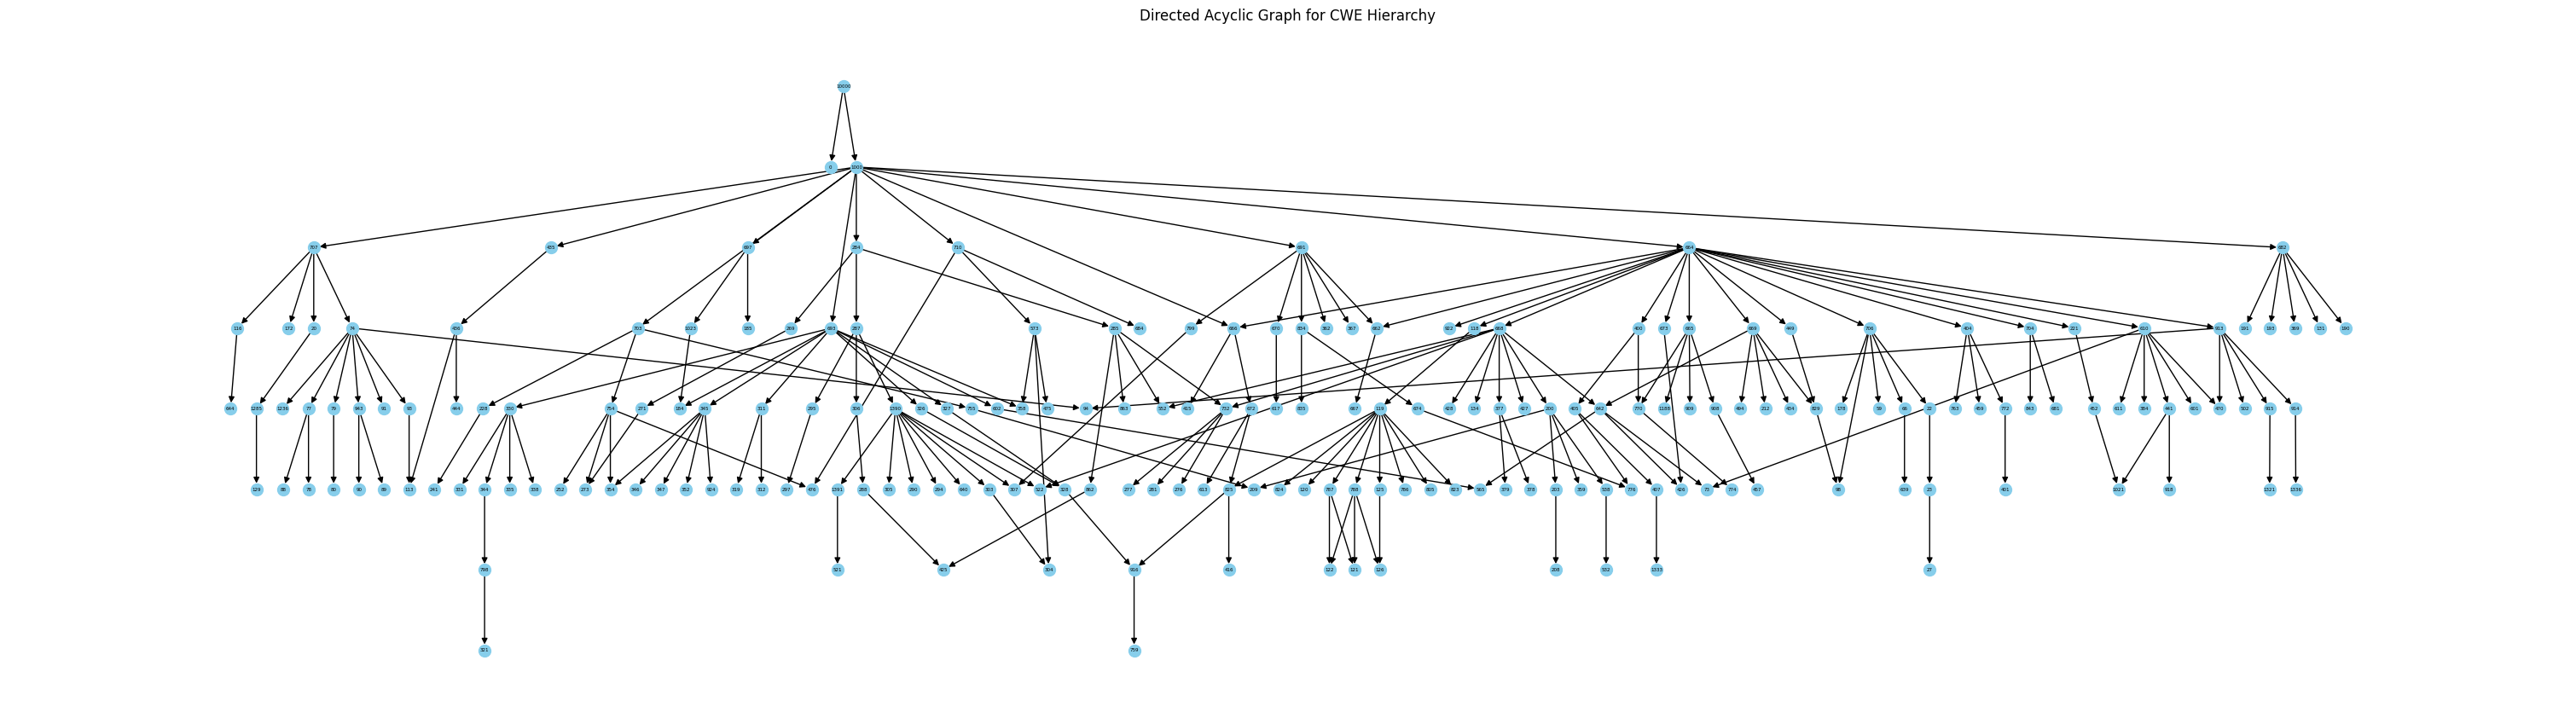

In [12]:
show_tree_graph(graph)

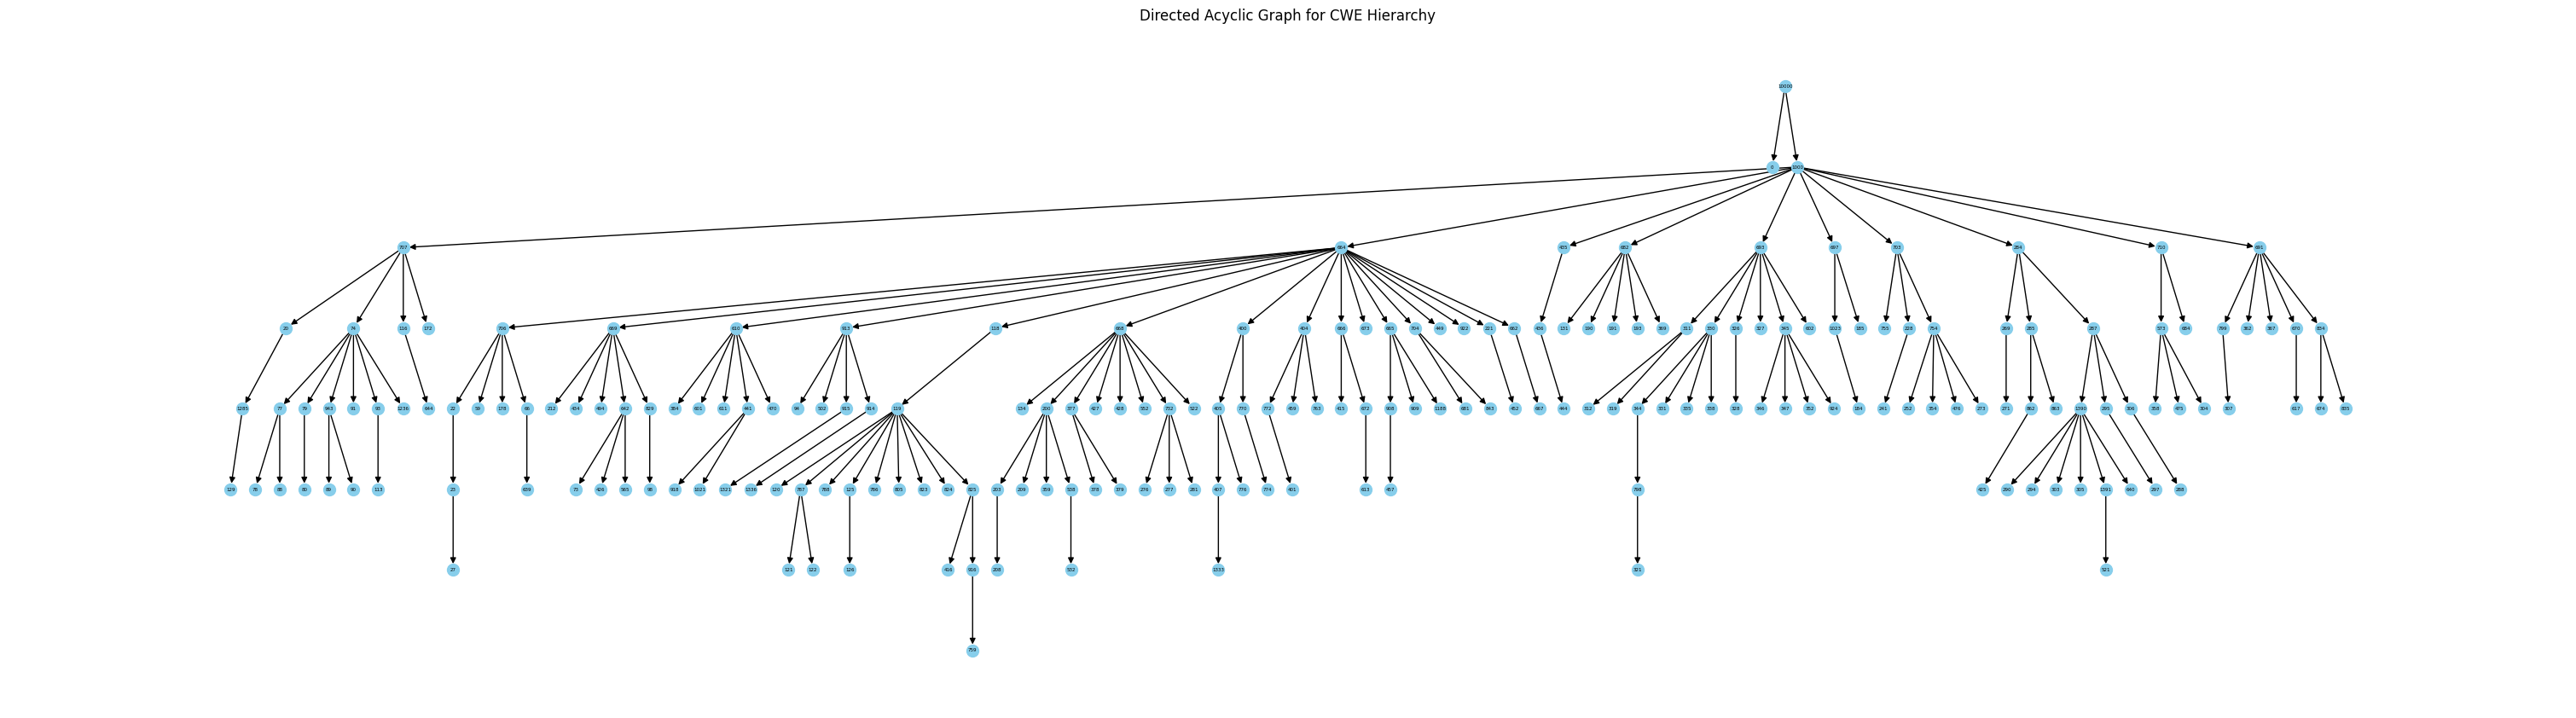

In [13]:
show_tree_graph(graph_unique)

In [14]:
def find_all_paths_to_all_nodes(graph, root):
    path_dict = {}
    for target in graph.nodes():
        # Compute all paths from root to target node
        # Note: this can be very slow and consume a lot of memory if there are many paths
        all_paths = list(nx.all_simple_paths(graph, root, target))
        if all_paths:
            path_list = []
            str_all_paths = [str(path) for path in all_paths[0]]
            path_list.append('-'.join(str_all_paths))
            path_dict[target] = path_list
    return path_dict

root = 10000
new_path_dict = find_all_paths_to_all_nodes(graph_unique, root)
print(len(new_path_dict))

# # Save the dictionary as a JSON file
with open('data_preprocessing/preprocessed_datasets/debug_datasets/graph_unique_all_paths.json', 'w') as f:
    json.dump(new_path_dict, f, indent=4)
print("Saved graph_unique_all_paths.json")

202
Saved graph_unique_all_paths.json


In [15]:
new_path_dict[20]

['10000-1000-707-20']

In [16]:
cutoff = 500

# Initialize cweiter with the starting cwe_id
cweiter = cwecounts.copy()
cweiter['assignedclass'] = "10000"
# cweiter['classpath'] = cweiter['cwe_id'].map(new_path_dict)
cweiter['classpath'] = "10000"
cweiter['cwe_id'] = cweiter['cwe_id'].astype(int)
cweiter['ori_count'] =cwecounts['count']
cweiter

,cwe_id,count,assignedclass,classpath,ori_count
0,0,59109,10000,10000,59109
1,20,23049,10000,10000,23049
2,22,1440,10000,10000,1440
3,23,2,10000,10000,2
4,27,1,10000,10000,1
...,...,...,...,...,...
166,1188,2,10000,10000,2
167,1236,44,10000,10000,44
168,1321,43,10000,10000,43
169,1333,5,10000,10000,5


In [17]:
def splitclass(df, split_class, new_path_dict):
    df = df.copy()
    def split_assigned_class(assigned_class, class_paths):
        assigned_class = str(assigned_class)
        class_path = list(new_path_dict[int(assigned_class)])[0]
        class_path_list = class_path.split('-')
        print(f"assigned_class: {assigned_class}, class_path_list:{class_path_list}")
        if assigned_class == class_path_list[-1]: # if assigned_class is the end of path
            new_path = class_path
        else:
            idx_after_assigned_class = class_path_list.index(assigned_class)+1
            class_path_after_assigned_class = class_path[idx_after_assigned_class]
            new_path = '-'.join(class_path_list[:idx_after_assigned_class])
        print(f"split_class{split_class} new_path {new_path}")
        return new_path
    df.loc[df['cwe_id'] == split_class, 'assignedclass'] = split_class
    df.loc[df['assignedclass'] == split_class, 'classpath'] = df[df['assignedclass'] == split_class].apply(
        lambda row: split_assigned_class(row['assignedclass'], row['classpath']), axis=1)
    return df

In [18]:
# Define a function to split and reassign CWE IDs based on the hierarchy
def split_and_reassign_cwe_ids(cweiter, graph, cwe_id):
    children = list(graph.neighbors(cwe_id))
    print(f"cwe_id:{cwe_id}---> children:{children}")
    # Check if there are more than two children and their total count exceeds the cutoff
    major_children_nodes = cweiter[(cweiter['cwe_id'].isin(children)) & (cweiter['count'] >= cutoff)]['cwe_id'].tolist()
    if len(children)>=2 and len(major_children_nodes) >= 2 :
#         print("cweiter[cweiter['cwe_id'].isin(children)]",cweiter[cweiter['cwe_id'].isin(children)])
        for child in children:
            # Split assignedclass for each child
            cweiter = splitclass(cweiter, child,new_path_dict)
    else:
        # Group all children and sum up their counts to the parent node
        print("Group all children and sum up their counts to the parent node")
        parent_count = cweiter[cweiter['cwe_id'].isin(children)]['count'].sum()
        cweiter.loc[cweiter['cwe_id'] == cwe_id, 'count'] += parent_count
        cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
        print("cwe_id",cweiter[cweiter['cwe_id']==cwe_id]['count'])
        print("children",cweiter[cweiter['cwe_id'].isin(children)]['count'])
    return cweiter

In [19]:
node_list = list(graph.nodes)
cnt = 0
while True:
    print(f"cnt:{cnt}@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
    previous_cweiter = cweiter.copy()
    # Iterate through the hierarchy
    for cwe_id in node_list:
        print(f"------START with cwe_id{cwe_id}----")
        cweiter = split_and_reassign_cwe_ids(cweiter, graph_unique, cwe_id)
#         print(cweiter[cweiter['cwe_id']==cwe_id])
    # Check if cweiter has changed after splitting and reassigning
    if previous_cweiter.equals(cweiter):
        break
    if cnt > 10:
        break
    cnt+=1
changed_cweiter = cweiter[cweiter['ori_count']!=cweiter['count']][['cwe_id','ori_count','count','assignedclass','classpath']]
print(changed_cweiter.shape)
print(changed_cweiter)


cnt:0@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
------START with cwe_id10000----
cwe_id:10000---> children:[0, 1000]
Group all children and sum up their counts to the parent node
0    59109
Name: count, dtype: int64
------START with cwe_id0----
cwe_id:0---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id1000----
cwe_id:1000---> children:[707, 664, 435, 682, 693, 697, 703, 284, 710, 691]
Group all children and sum up their counts to the parent node
49     2467
119      17
127      79
129      38
130      11
Name: count, dtype: int64
------START with cwe_id707----
cwe_id:707---> children:[20, 74, 116, 172]
assigned_class: 20, class_path_list:['10000', '1000', '707', '20']
split_class20 new_path 10000-1000-707-20
assigned_class: 74, class_path_list:['10000', '1000', '707', '74']
split_class74 new_path 10000-1000-707-74
assigned_class: 116, class_path_list:['10000', '1000', '707', '116']
split_class116 new_path 1000

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Series([], Name: count, dtype: int64)
------START with cwe_id682----
cwe_id:682---> children:[131, 190, 191, 193, 369]
assigned_class: 131, class_path_list:['10000', '1000', '682', '131']
split_class131 new_path 10000-1000-682-131
assigned_class: 190, class_path_list:['10000', '1000', '682', '190']
split_class190 new_path 10000-1000-682-190
assigned_class: 191, class_path_list:['10000', '1000', '682', '191']
split_class191 new_path 10000-1000-682-191
assigned_class: 193, class_path_list:['10000', '1000', '682', '193']
split_class193 new_path 10000-1000-682-193
assigned_class: 369, class_path_list:['10000', '1000', '682', '369']
split_class369 new_path 10000-1000-682-369
------START with cwe_id131----
cwe_id:131---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id668----
cwe_id:668---> children:[134, 200, 377, 427, 428, 552, 732, 522]
assigned_class: 134, class_path_list:['10000', '1000', '664', '668'

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0


Series([], Name: count, dtype: int64)
------START with cwe_id359----
cwe_id:359---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id362----
cwe_id:362---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id367----
cwe_id:367---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id369----
cwe_id:369---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id377----
cwe_id:377---> children:[378, 379]
Group all children and sum up their counts to the parent node
82    17
83    17
Name: count, dtype: int64
------START with cwe_id378----
cwe_id:378---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)


Series([], Name: count, dtype: int64)
------START with cwe_id924----
cwe_id:924---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id1021----
cwe_id:1021---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id221----
cwe_id:221---> children:[452]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id452----
cwe_id:452---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id1188----
cwe_id:1188---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id1236----
cwe_id:1236---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
-----

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Series([], Name: count, dtype: int64)
------START with cwe_id125----
cwe_id:125---> children:[126]
Group all children and sum up their counts to the parent node
26    5
Name: count, dtype: int64
------START with cwe_id126----
cwe_id:126---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id1285----
cwe_id:1285---> children:[129]
Group all children and sum up their counts to the parent node
27    293
Name: count, dtype: int64
------START with cwe_id129----
cwe_id:129---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id682----
cwe_id:682---> children:[131, 190, 191, 193, 369]
assigned_class: 131, class_path_list:['10000', '1000', '682', '131']
split_class131 new_path 10000-1000-682-131
assigned_class: 190, class_path_list:['10000', '1000', '682', '190']
split_class190 new_path 10000-1000-682-190
assigned_class: 191, cl

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0


73     126
74     133
75     570
163      4
Name: count, dtype: int64
------START with cwe_id346----
cwe_id:346---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id347----
cwe_id:347---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id352----
cwe_id:352---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id354----
cwe_id:354---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id358----
cwe_id:358---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id359----
cwe_id:359---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: cou

Series([], Name: count, dtype: int64)
------START with cwe_id863----
cwe_id:863---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id909----
cwe_id:909---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id915----
cwe_id:915---> children:[1321]
Group all children and sum up their counts to the parent node
168    43
Name: count, dtype: int64
------START with cwe_id441----
cwe_id:441---> children:[918, 1021]
Group all children and sum up their counts to the parent node
161    561
165     64
Name: count, dtype: int64
------START with cwe_id918----
cwe_id:918---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id922----
cwe_id:922---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: 

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id787----
cwe_id:787---> children:[121, 122]
Group all children and sum up their counts to the parent node
23     5
24    53
Name: count, dtype: int64
------START with cwe_id121----
cwe_id:121---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id788----
cwe_id:788---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id122----
cwe_id:122---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id125----
cwe_id:125---> children:[126]
Group all children and sum up their counts to the parent node
26    5
Name: count, dtype: int64
------START with cwe_id126----
cwe_id:126---> children:[]
Group all children and sum up their cou

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0


Series([], Name: count, dtype: int64)
------START with cwe_id326----
cwe_id:326---> children:[328]
Group all children and sum up their counts to the parent node
67    1
Name: count, dtype: int64
------START with cwe_id327----
cwe_id:327---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id328----
cwe_id:328---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id331----
cwe_id:331---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id335----
cwe_id:335---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id338----
cwe_id:338---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START wit

Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id805----
cwe_id:805---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id823----
cwe_id:823---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id824----
cwe_id:824---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id449----
cwe_id:449---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id835----
cwe_id:835---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id843----
cwe_id:843---> children:[]
Group all children and sum up their counts to the pa

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

96    146
Name: count, dtype: int64
------START with cwe_id116----
cwe_id:116---> children:[644]
Group all children and sum up their counts to the parent node
117    2
Name: count, dtype: int64
------START with cwe_id118----
cwe_id:118---> children:[119]
Group all children and sum up their counts to the parent node
21    27331
Name: count, dtype: int64
------START with cwe_id119----
cwe_id:119---> children:[120, 787, 788, 125, 786, 805, 823, 824, 825]
assigned_class: 120, class_path_list:['10000', '1000', '664', '118', '119', '120']
split_class120 new_path 10000-1000-664-118-119-120
assigned_class: 787, class_path_list:['10000', '1000', '664', '118', '119', '787']
split_class787 new_path 10000-1000-664-118-119-787
assigned_class: 788, class_path_list:['10000', '1000', '664', '118', '119', '788']
split_class788 new_path 10000-1000-664-118-119-788
assigned_class: 125, class_path_list:['10000', '1000', '664', '118', '119', '125']
split_class125 new_path 10000-1000-664-118-119-125
assigned

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Group all children and sum up their counts to the parent node
62    22
63    10
Name: count, dtype: int64
------START with cwe_id312----
cwe_id:312---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id319----
cwe_id:319---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id330----
cwe_id:330---> children:[344, 331, 335, 338]
Group all children and sum up their counts to the parent node
69    7
70    2
71    5
Name: count, dtype: int64
------START with cwe_id344----
cwe_id:344---> children:[798]
Group all children and sum up their counts to the parent node
145    27
Name: count, dtype: int64
------START with cwe_id798----
cwe_id:798---> children:[321]
Group all children and sum up their counts to the parent node
64    1
Name: count, dtype: int64
------START with cwe_id321----
cwe_id:321---> children:[]
Group all childr

Series([], Name: count, dtype: int64)
------START with cwe_id763----
cwe_id:763---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id770----
cwe_id:770---> children:[774]
Group all children and sum up their counts to the parent node
140    3
Name: count, dtype: int64
------START with cwe_id774----
cwe_id:774---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id776----
cwe_id:776---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id405----
cwe_id:405---> children:[407, 776]
Group all children and sum up their counts to the parent node
141    5
Name: count, dtype: int64
------START with cwe_id786----
cwe_id:786---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------STA

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id435----
cwe_id:435---> children:[436]
Group all children and sum up their counts to the parent node
95    686
Name: count, dtype: int64
------START with cwe_id436----
cwe_id:436---> children:[444]
Group all children and sum up their counts to the parent node
96    146
Name: count, dtype: int64
------START with cwe_id116----
cwe_id:116---> children:[644]
Group all children and sum up their counts to the parent node
117    2
Name: count, dtype: int64
------START with cwe_id118----
cwe_id:118---> children:[119]
Group all children and sum up their counts to the parent node
21    27331
Name: count, dtype: int64
------START with cwe_id119----
cwe_id:119---> children:[120, 787, 788, 125, 786, 805, 823, 824, 825]
assigned_class: 120, class_path_list:['10000', '1000', '664', '118', '119', '120']
split_class120 new_path 10000-1000-664-118-119-120
assigned_class: 787, class_p

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Series([], Name: count, dtype: int64)
------START with cwe_id311----
cwe_id:311---> children:[312, 319]
Group all children and sum up their counts to the parent node
62    22
63    10
Name: count, dtype: int64
------START with cwe_id312----
cwe_id:312---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id319----
cwe_id:319---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id330----
cwe_id:330---> children:[344, 331, 335, 338]
Group all children and sum up their counts to the parent node
69    7
70    2
71    5
Name: count, dtype: int64
------START with cwe_id344----
cwe_id:344---> children:[798]
Group all children and sum up their counts to the parent node
145    28
Name: count, dtype: int64
------START with cwe_id798----
cwe_id:798---> children:[321]
Group all children and sum up their counts to the parent node
64  

136    5
Name: count, dtype: int64
------START with cwe_id759----
cwe_id:759---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id763----
cwe_id:763---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id770----
cwe_id:770---> children:[774]
Group all children and sum up their counts to the parent node
140    3
Name: count, dtype: int64
------START with cwe_id774----
cwe_id:774---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id776----
cwe_id:776---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id405----
cwe_id:405---> children:[407, 776]
Group all children and sum up their counts to the parent node
141    5
Name: count, dtype: int64
------START 

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Series([], Name: count, dtype: int64)
------START with cwe_id829----
cwe_id:829---> children:[98]
Group all children and sum up their counts to the parent node
18    1
Name: count, dtype: int64
------START with cwe_id113----
cwe_id:113---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id435----
cwe_id:435---> children:[436]
Group all children and sum up their counts to the parent node
95    832
Name: count, dtype: int64
------START with cwe_id436----
cwe_id:436---> children:[444]
Group all children and sum up their counts to the parent node
96    146
Name: count, dtype: int64
------START with cwe_id116----
cwe_id:116---> children:[644]
Group all children and sum up their counts to the parent node
117    2
Name: count, dtype: int64
------START with cwe_id118----
cwe_id:118---> children:[119]
Group all children and sum up their counts to the parent node
21    27331
Name: count, dtype: int64
------START

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

60    19
Name: count, dtype: int64
------START with cwe_id307----
cwe_id:307---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id311----
cwe_id:311---> children:[312, 319]
Group all children and sum up their counts to the parent node
62    22
63    10
Name: count, dtype: int64
------START with cwe_id312----
cwe_id:312---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id319----
cwe_id:319---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id330----
cwe_id:330---> children:[344, 331, 335, 338]
Group all children and sum up their counts to the parent node
69    7
70    2
71    5
Name: count, dtype: int64
------START with cwe_id344----
cwe_id:344---> children:[798]
Group all children and sum up their counts to the parent node
145    2

Series([], Name: count, dtype: int64)
------START with cwe_id916----
cwe_id:916---> children:[759]
Group all children and sum up their counts to the parent node
136    5
Name: count, dtype: int64
------START with cwe_id759----
cwe_id:759---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id763----
cwe_id:763---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id770----
cwe_id:770---> children:[774]
Group all children and sum up their counts to the parent node
140    3
Name: count, dtype: int64
------START with cwe_id774----
cwe_id:774---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id776----
cwe_id:776---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START wi

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Series([], Name: count, dtype: int64)
------START with cwe_id829----
cwe_id:829---> children:[98]
Group all children and sum up their counts to the parent node
18    1
Name: count, dtype: int64
------START with cwe_id113----
cwe_id:113---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id435----
cwe_id:435---> children:[436]
Group all children and sum up their counts to the parent node
95    978
Name: count, dtype: int64
------START with cwe_id436----
cwe_id:436---> children:[444]
Group all children and sum up their counts to the parent node
96    146
Name: count, dtype: int64
------START with cwe_id116----
cwe_id:116---> children:[644]
Group all children and sum up their counts to the parent node
117    2
Name: count, dtype: int64
------START with cwe_id118----
cwe_id:118---> children:[119]
Group all children and sum up their counts to the parent node
21    27331
Name: count, dtype: int64
------START

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Group all children and sum up their counts to the parent node
60    19
Name: count, dtype: int64
------START with cwe_id307----
cwe_id:307---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id311----
cwe_id:311---> children:[312, 319]
Group all children and sum up their counts to the parent node
62    22
63    10
Name: count, dtype: int64
------START with cwe_id312----
cwe_id:312---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id319----
cwe_id:319---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id330----
cwe_id:330---> children:[344, 331, 335, 338]
Group all children and sum up their counts to the parent node
69    7
70    2
71    5
Name: count, dtype: int64
------START with cwe_id344----
cwe_id:344---> children:[798]
Group al

126    13
153    30
Name: count, dtype: int64
------START with cwe_id681----
cwe_id:681---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id684----
cwe_id:684---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id916----
cwe_id:916---> children:[759]
Group all children and sum up their counts to the parent node
136    5
Name: count, dtype: int64
------START with cwe_id759----
cwe_id:759---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id763----
cwe_id:763---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id770----
cwe_id:770---> children:[774]
Group all children and sum up their counts to the parent node
140    3
Name: count, dtype: int64
------

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

19    1
Name: count, dtype: int64
------START with cwe_id94----
cwe_id:94---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id913----
cwe_id:913---> children:[94, 502, 915, 914]
Group all children and sum up their counts to the parent node
17     640
103    454
159    363
Name: count, dtype: int64
------START with cwe_id98----
cwe_id:98---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id829----
cwe_id:829---> children:[98]
Group all children and sum up their counts to the parent node
18    1
Name: count, dtype: int64
------START with cwe_id113----
cwe_id:113---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id435----
cwe_id:435---> children:[436]
Group all children and sum up their counts to the parent node
95    1124
Name: coun

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

57      1
77     85
100     3
Name: count, dtype: int64
------START with cwe_id305----
cwe_id:305---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id306----
cwe_id:306---> children:[288]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id691----
cwe_id:691---> children:[799, 362, 367, 670, 834]
assigned_class: 362, class_path_list:['10000', '1000', '691', '362']
split_class362 new_path 10000-1000-691-362
assigned_class: 367, class_path_list:['10000', '1000', '691', '367']
split_class367 new_path 10000-1000-691-367
assigned_class: 670, class_path_list:['10000', '1000', '691', '670']
split_class670 new_path 10000-1000-691-670
assigned_class: 834, class_path_list:['10000', '1000', '691', '834']
split_class834 new_path 10000-1000-691-834
------START with cwe_id799----
cwe_id:799---> children:[307]
Group all children and sum up their

121    11
Name: count, dtype: int64
------START with cwe_id667----
cwe_id:667---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id834----
cwe_id:834---> children:[674, 835]
Group all children and sum up their counts to the parent node
125    124
152    934
Name: count, dtype: int64
------START with cwe_id674----
cwe_id:674---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id704----
cwe_id:704---> children:[681, 843]
Group all children and sum up their counts to the parent node
126    13
153    30
Name: count, dtype: int64
------START with cwe_id681----
cwe_id:681---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id684----
cwe_id:684---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: cou

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

13    7111
14      22
Name: count, dtype: int64
------START with cwe_id89----
cwe_id:89---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id90----
cwe_id:90---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id91----
cwe_id:91---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id93----
cwe_id:93---> children:[113]
Group all children and sum up their counts to the parent node
19    1
Name: count, dtype: int64
------START with cwe_id94----
cwe_id:94---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id913----
cwe_id:913---> children:[94, 502, 915, 914]
Group all children and sum up their counts to the parent node
17     640
103    454
159    406
Nam

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Series([], Name: count, dtype: int64)
------START with cwe_id303----
cwe_id:303---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id304----
cwe_id:304---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id710----
cwe_id:710---> children:[573, 684]
Group all children and sum up their counts to the parent node
128    4
Name: count, dtype: int64
------START with cwe_id573----
cwe_id:573---> children:[358, 475, 304]
Group all children and sum up their counts to the parent node
57      1
77     85
100     3
Name: count, dtype: int64
------START with cwe_id305----
cwe_id:305---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id306----
cwe_id:306---> children:[288]
Group all children and sum up their counts to the parent node
Series([], Na

115    433
Name: count, dtype: int64
------START with cwe_id639----
cwe_id:639---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id640----
cwe_id:640---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id644----
cwe_id:644---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id662----
cwe_id:662---> children:[667]
Group all children and sum up their counts to the parent node
121    11
Name: count, dtype: int64
------START with cwe_id667----
cwe_id:667---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id834----
cwe_id:834---> children:[674, 835]
Group all children and sum up their counts to the parent node
125    124
152    934
Name: count, dtype: in

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

11    1
Name: count, dtype: int64
------START with cwe_id80----
cwe_id:80---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id88----
cwe_id:88---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id943----
cwe_id:943---> children:[89, 90]
Group all children and sum up their counts to the parent node
13    7111
14      22
Name: count, dtype: int64
------START with cwe_id89----
cwe_id:89---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id90----
cwe_id:90---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id91----
cwe_id:91---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START 

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Series([], Name: count, dtype: int64)
------START with cwe_id295----
cwe_id:295---> children:[297]
Group all children and sum up their counts to the parent node
55    2
Name: count, dtype: int64
------START with cwe_id297----
cwe_id:297---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id303----
cwe_id:303---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id304----
cwe_id:304---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id710----
cwe_id:710---> children:[573, 684]
Group all children and sum up their counts to the parent node
128    4
Name: count, dtype: int64
------START with cwe_id573----
cwe_id:573---> children:[358, 475, 304]
Group all children and sum up their counts to the parent node
57      1
77     85
100     3
Name:

Group all children and sum up their counts to the parent node
114    1115
Name: count, dtype: int64
------START with cwe_id617----
cwe_id:617---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id66----
cwe_id:66---> children:[639]
Group all children and sum up their counts to the parent node
115    433
Name: count, dtype: int64
------START with cwe_id639----
cwe_id:639---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id640----
cwe_id:640---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id644----
cwe_id:644---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id662----
cwe_id:662---> children:[667]
Group all children and sum up their counts to the

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Group all children and sum up their counts to the parent node
9     751
12     78
Name: count, dtype: int64
------START with cwe_id78----
cwe_id:78---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id79----
cwe_id:79---> children:[80]
Group all children and sum up their counts to the parent node
11    1
Name: count, dtype: int64
------START with cwe_id80----
cwe_id:80---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id88----
cwe_id:88---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id943----
cwe_id:943---> children:[89, 90]
Group all children and sum up their counts to the parent node
13    7111
14      22
Name: count, dtype: int64
------START with cwe_id89----
cwe_id:89---> children:[]
Group all children and sum up their coun

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

154    197
155    248
Name: count, dtype: int64
------START with cwe_id287----
cwe_id:287---> children:[1390, 295, 306]
Group all children and sum up their counts to the parent node
54    237
59     31
Name: count, dtype: int64
------START with cwe_id1390----
cwe_id:1390---> children:[290, 294, 303, 305, 1391, 640]
Group all children and sum up their counts to the parent node
52     86
53     12
56      4
58      5
116    39
Name: count, dtype: int64
------START with cwe_id290----
cwe_id:290---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id294----
cwe_id:294---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id295----
cwe_id:295---> children:[297]
Group all children and sum up their counts to the parent node
55    2
Name: count, dtype: int64
------START with cwe_id297----
cwe_id:297---> children:[]
Group all chil

Series([], Name: count, dtype: int64)
------START with cwe_id611----
cwe_id:611---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id672----
cwe_id:672---> children:[613]
Group all children and sum up their counts to the parent node
113    244
Name: count, dtype: int64
------START with cwe_id613----
cwe_id:613---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id670----
cwe_id:670---> children:[617]
Group all children and sum up their counts to the parent node
114    1115
Name: count, dtype: int64
------START with cwe_id617----
cwe_id:617---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id66----
cwe_id:66---> children:[639]
Group all children and sum up their counts to the parent node
115    433
Name: count, dtype: int64
------STA

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

84     180
99      11
110    262
112    609
Name: count, dtype: int64
------START with cwe_id74----
cwe_id:74---> children:[77, 79, 943, 91, 93, 1236]
assigned_class: 77, class_path_list:['10000', '1000', '707', '74', '77']
split_class77 new_path 10000-1000-707-74-77
assigned_class: 79, class_path_list:['10000', '1000', '707', '74', '79']
split_class79 new_path 10000-1000-707-74-79
assigned_class: 943, class_path_list:['10000', '1000', '707', '74', '943']
split_class943 new_path 10000-1000-707-74-943
assigned_class: 91, class_path_list:['10000', '1000', '707', '74', '91']
split_class91 new_path 10000-1000-707-74-91
assigned_class: 93, class_path_list:['10000', '1000', '707', '74', '93']
split_class93 new_path 10000-1000-707-74-93
assigned_class: 1236, class_path_list:['10000', '1000', '707', '74', '1236']
split_class1236 new_path 10000-1000-707-74-1236
------START with cwe_id77----
cwe_id:77---> children:[78, 88]
Group all children and sum up their counts to the parent node
9     751
1

Series([], Name: count, dtype: int64)
------START with cwe_id271----
cwe_id:271---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id273----
cwe_id:273---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id732----
cwe_id:732---> children:[276, 277, 281]
Group all children and sum up their counts to the parent node
46    40
47     3
48    57
Name: count, dtype: int64
------START with cwe_id276----
cwe_id:276---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id277----
cwe_id:277---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id281----
cwe_id:281---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, 

/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cweiter[cweiter['cwe_id'].isin(children)]['count'] = 0
/tmp/ipykernel_147379/1528412665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Series([], Name: count, dtype: int64)
------START with cwe_id538----
cwe_id:538---> children:[532]
Group all children and sum up their counts to the parent node
106    105
Name: count, dtype: int64
------START with cwe_id532----
cwe_id:532---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id552----
cwe_id:552---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id565----
cwe_id:565---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id602----
cwe_id:602---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START with cwe_id601----
cwe_id:601---> children:[]
Group all children and sum up their counts to the parent node
Series([], Name: count, dtype: int64)
------START 

In [20]:
# Calculate statistics
aclass_stats = cweiter[['assignedclass', 'count']].drop_duplicates()

# Map old cwe_id to new cwe_id
cwechanges = cweiter[['cwe_id', 'assignedclass']].drop_duplicates()

# Filter cwechanges to remove rows where count is less than the cutoff
cwechanges = cwechanges.merge(aclass_stats[['assignedclass', 'count']], left_on='assignedclass', right_on='assignedclass', how='inner')
cwechanges = cwechanges[cwechanges['count'] >= cutoff]

# Write old -> new cwe_ids to a CSV file
cwechanges.to_csv("cwechanges.csv", index=False)

# Print aclass_stats in descending order of count
print(aclass_stats.sort_values(by='count', ascending=False))

# Print the number of rows in aclass_stats where count is greater than or equal to cutoff
print(len(aclass_stats[aclass_stats['count'] >= cutoff]))

# Calculate the percentage of samples dropping if we used 'cutoff'
percent_samples_dropping = cweiter[cweiter['count'] < cutoff]['count'].sum() / cweiter['count'].sum()
print(percent_samples_dropping)

    assignedclass   count
149           825  121750
164           943   85597
134         10000   60864
0           10000   59109
21          10000   27331
..            ...     ...
33          10000       2
93            428       2
162           922       1
142           786       1
4           10000       1

[131 rows x 2 columns]
51
0.010541697278133763


In [21]:
# cweiter['ori_count']=cwecounts['count']
# changed_cweiter = cweiter[cweiter['ori_count']!=cweiter['count']][['cwe_id','ori_count','count','assignedclass','classpath']]
# print(changed_cweiter.shape)
# changed_cweiter


# final_target_cwe_df = changed_cweiter[changed_cweiter['count']>=cutoff]
# print(final_target_cwe_df.shape)
# final_target_cwe_df